# COSC 5557 Warm-Up (Almountassir)

* Import the wine quality dataset : https://archive.ics.uci.edu/dataset/186/wine+quality
* Predict the wine quality (as a numerical value) through a **regression** model.
* Predict the wine quality (as a class value) through a **classification** model.

**RESULTS SUMMARY**
* The *regression* model resulted in a **0.58 Mean Squared Error** loss value.
* The *classification* model resulted in a (maximum) **training accuracy score of 51.38%** AND a (maximum) **testing accuracy score of 16.68%**.


---
# Loading the dataset

In [ ]:
import pandas as pd

red_wine_quality_df = pd.read_csv('winequality-red.csv')

---
# Observe the dataset

In [ ]:
red_wine_quality_df.head(5)

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


In [ ]:
# displays (rows, columns)
red_wine_quality_df.shape

(1599, 1)

---
# Process the dataset

*RESOURCE - https://youtu.be/5_QXMwezPJE?si=Q3U0Rs9h1wAS8jTI&t=230*

We can observe that the column contains all the labels together.

We also observe that the data values in the rows are all in one cell and not seperated.

We want to instead seperate the data, to do that read the data with the `read_csv` method and indicate the value which the `sep` parameter takes. In our case it is `;`.

In [ ]:
import pandas as pd

# Read the data and seperate based on the ';' delimiter:
red_wine_quality_df = pd.read_csv('winequality-red.csv', sep=';')

# The data should be good to go now:
red_wine_quality_df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [ ]:
# Check the shape to make sure of the right changes:
data_shape = red_wine_quality_df.shape

data_shape

(1599, 12)

---
# Pandas Dataset -> Tensors

**RESOURCES :**
* https://youtu.be/Xp0LtPBcos0?si=bfLJ_HGFsVBOCPCe
* https://youtu.be/V_xro1bcAuA?si=dCSLaKcgFG7Xlzy6&t=32982

If we observe our dataset, it is of type `pandas.core.frame.DataFrame` by checking with `type(<dataset>)`.

In [ ]:
import torch

type(red_wine_quality_df)

pandas.core.frame.DataFrame

First, we split our dataset into our **input features** and our **output features** sets.

Our **output features** is the "quality" column.

In [ ]:
input = red_wine_quality_df.drop(labels="quality", axis="columns",)

input

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [ ]:
output = red_wine_quality_df["quality"]
output

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

We then convert to **numpy** arrays so that we can then convert to **tensors**.

In [ ]:
input_numpy = input.values

type(input_numpy)

numpy.ndarray

In [ ]:
output_numpy = output.values

type(output_numpy)

numpy.ndarray

Finally, convert to **tensors**.

In [ ]:
import torch

# convert to 'float32' as thats the default torch data type;
# numpy arrays are by default 'float64':
X = torch.from_numpy(input_numpy).type(torch.float32)
y = torch.from_numpy(output_numpy).type(torch.float32)

X.dtype, y.dtype

(torch.float32, torch.float32)

As an additional adjustment for later use, modify the shape of the `y` tensor to be of **rows** and **columns**.

It is currently of shape `[1599]`.

We want it to be of shape `[1599, 1]`.

In [ ]:
print(f"y.shape before : {y.shape}")
y = torch.unsqueeze(y, 1)
print(f"y.shape after : {y.shape}")

y.shape before : torch.Size([1599])
y.shape after : torch.Size([1599, 1])


---
# Splitting our Tensors into Training & Testing Sets

**RESOURCE**: https://youtu.be/V_xro1bcAuA?si=J1dqGK1crHbd5K1j&t=33384

In [ ]:
from sklearn.model_selection import train_test_split

# A constant random seed to get same results every time.
random_seed = 90
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.75,
    random_state=random_seed,
)

len(X_train), len(X_test), len(y_train), len(y_test)

(1199, 400, 1199, 400)

---
# Creating our Linear Regression Model

**RESOURCE : https://youtu.be/V_xro1bcAuA?si=FgfLiACcrPbkcyco&t=28240**

In [ ]:
from torch import nn

class LinearRegression(nn.Module):

  def __init__(self, input_features: int, output_features: int):
    super().__init__()

    # y = weights_vector * X + bias_vector
    # y -> output
    # X -> input
    self.linear = nn.Linear(
        in_features=input_features,
        out_features=output_features,
        bias=True,
    )

  # This method computes, using the linear formula...
  # with the weights & bias...
  # taking as input a tensor (X)...
  # and returning as output the computed tensor:
  def forward(self, X : torch.Tensor) -> torch.Tensor:
    return self.linear(X)

## Let us create an instance of our Linear Regression model and check out its initial parameters (weights & bias).

In [ ]:
in_features = X_train.shape[1]
out_features = y_train.shape[1]

in_features, out_features

(11, 1)

In [ ]:
# Seed is set for similar results every time we run the code.
torch.manual_seed(90)

linear_regression_model = LinearRegression(
    input_features=in_features,
    output_features=out_features,
)

linear_regression_model

LinearRegression(
  (linear): Linear(in_features=11, out_features=1, bias=True)
)

In [ ]:
lr_model_weights = linear_regression_model.state_dict()['linear.weight']
lr_model_bias = linear_regression_model.state_dict()['linear.bias']

In [ ]:
lr_model_weights

tensor([[-0.1918,  0.1379, -0.0799,  0.1015, -0.1292, -0.1074,  0.0310,  0.2530,
          0.0820, -0.1740,  0.0203]])

In [ ]:
lr_model_bias

tensor([0.2174])

## Looks good!

---
# Training & Testing our Linear Regression Model

**RESOURCE : https://youtu.be/V_xro1bcAuA?si=xALSd-15TJap9PCW&t=28989**

## Loss Function - Mean Squared Error

In [ ]:
loss_function = nn.MSELoss()
loss_function

MSELoss()

## Optimizer - Stochastic Gradient Descent

In [ ]:
learning_rate = 0.0001

optimizer = torch.optim.SGD(
    params=linear_regression_model.parameters(),
    lr=learning_rate
)

## Training Loop

In [ ]:
# Set a seed to get similar results each time the code runs:
torch.manual_seed(90)

# epochs <-> number of training iterations (I think):
epochs = 1000

for epoch in range(epochs):
  # Set the model to "training" mode:
  linear_regression_model.train()

  # Calculate the predicted output:
  y_predicted = linear_regression_model(X_train)

  # Calculate the error loss...
  # Between actual and predicted output:
  loss = loss_function(y_predicted, y_train)

  optimizer.zero_grad()

  # Backpropogate the calculated derivates (I think):
  loss.backward()

  # Perform a step of gradient descent:
  optimizer.step()

  # --------------------
  # TESTING
  # --------------------
  # Set model to evaluation mode:
  linear_regression_model.eval()

  if epoch % 10 == 0:
    with torch.inference_mode():
      test_y_predicted = linear_regression_model(X_test)

      test_loss = loss_function(test_y_predicted, y_test)

    print(f"EPOCH {epoch} <--> Training Loss : {loss:.2f} | Test Loss : {test_loss: .2f}")
  # -------------------------------------------------------

EPOCH 0 <--> Training Loss : 41.95 | Test Loss :  17.99
EPOCH 10 <--> Training Loss : 11.69 | Test Loss :  11.55
EPOCH 20 <--> Training Loss : 8.58 | Test Loss :  8.54
EPOCH 30 <--> Training Loss : 6.38 | Test Loss :  6.39
EPOCH 40 <--> Training Loss : 4.81 | Test Loss :  4.85
EPOCH 50 <--> Training Loss : 3.68 | Test Loss :  3.75
EPOCH 60 <--> Training Loss : 2.87 | Test Loss :  2.95
EPOCH 70 <--> Training Loss : 2.29 | Test Loss :  2.36
EPOCH 80 <--> Training Loss : 1.86 | Test Loss :  1.94
EPOCH 90 <--> Training Loss : 1.55 | Test Loss :  1.62
EPOCH 100 <--> Training Loss : 1.32 | Test Loss :  1.39
EPOCH 110 <--> Training Loss : 1.14 | Test Loss :  1.21
EPOCH 120 <--> Training Loss : 1.01 | Test Loss :  1.08
EPOCH 130 <--> Training Loss : 0.91 | Test Loss :  0.98
EPOCH 140 <--> Training Loss : 0.84 | Test Loss :  0.90
EPOCH 150 <--> Training Loss : 0.78 | Test Loss :  0.84
EPOCH 160 <--> Training Loss : 0.74 | Test Loss :  0.79
EPOCH 170 <--> Training Loss : 0.70 | Test Loss :  0.76

## Testing

In [ ]:
# Set model to evaluation mode:
linear_regression_model.eval()

with torch.inference_mode():
  test_y_predicted = linear_regression_model(X_test)

  test_loss = loss_function(test_y_predicted, y_test)

  print(f"Test Loss : {test_loss}")

Test Loss : 0.575282633304596


Lets try making a prediction using one of the rows of our dataset and verifying the result with the actual output value.

In [ ]:
sample_row = 0

linear_regression_model.eval()

with torch.inference_mode():
  predicted = linear_regression_model(X_test[sample_row])

predicted

tensor([5.6471])

In [ ]:
actual = y_test[sample_row]
actual

tensor([6.])

---
# Classification Model

**RESOURCE : https://youtu.be/V_xro1bcAuA?si=IXahW95cTOjlXz1Q&t=46662**

## Visualization of the wine classes

*Change `FEATURE_NUM` to visualize the data according to one of the 11 features in the dataset.*

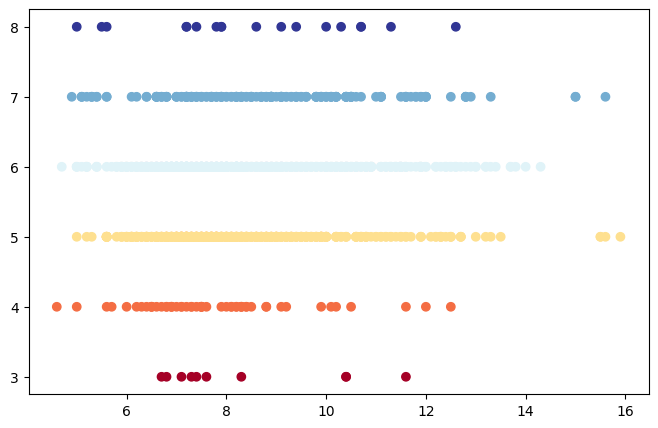

In [ ]:
import matplotlib.pyplot as plt

# Features (0 - 10)
FEATURE_NUM = 0

plt.figure(figsize=(8, 5))
plt.scatter(X[:, FEATURE_NUM], y, c=y, cmap=plt.cm.RdYlBu)

**ERROR FIX FOR LATER**

Modify the class labels to start at 0 instead of 3... this will fix an error in the loss function.

In our new class labels tensor:
* 0 = quality of 3
* 1 = quality of 4
* 2 = quality of 5
* 3 = quality of 6
* 4 = quality of 7
* 5 = quality of 8

In [ ]:
y

tensor([[5.],
        [5.],
        [5.],
        ...,
        [6.],
        [5.],
        [6.]])

In [ ]:
y.unique()

tensor([3., 4., 5., 6., 7., 8.])

In [ ]:
starting_class_num = 3
y = y - starting_class_num
y

tensor([[2.],
        [2.],
        [2.],
        ...,
        [3.],
        [2.],
        [3.]])

In [ ]:
y.unique()

tensor([0., 1., 2., 3., 4., 5.])

## Building our Classification Model

In [ ]:
import torch

class ClassifierModel(nn.Module):
  def __init__(self, input_features:int, output_features:int):
    super().__init__()
    self.linear = nn.Linear(in_features=input_features, out_features=output_features)

  def forward(self, X:torch.Tensor):
    return self.linear(X)


In [ ]:
in_features = X.shape[1]
in_features

11

In [ ]:
import torch
class_labels  = torch.unique(y)

out_features = len(class_labels)

print(class_labels)
print(out_features)

tensor([0., 1., 2., 3., 4., 5.])
6


In [ ]:
classifier_model = ClassifierModel(
    input_features=in_features,
    output_features=out_features,
)

classifier_model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.1918,  0.1379, -0.0799,  0.1015, -0.1292, -0.1074,  0.0310,  0.2530,
                        0.0820, -0.1740,  0.0203],
                      [ 0.2174,  0.0103,  0.1980, -0.2922, -0.0717, -0.0843, -0.1432,  0.0680,
                       -0.1011, -0.0433, -0.0991],
                      [-0.0509, -0.2617, -0.2113,  0.0645, -0.2467, -0.1609,  0.1530, -0.1498,
                       -0.0330, -0.0341, -0.0835],
                      [ 0.2264,  0.2311, -0.2536, -0.2923,  0.0258, -0.0335,  0.1537, -0.0423,
                       -0.1368,  0.0368,  0.1507],
                      [ 0.0040, -0.1227,  0.1311, -0.0840,  0.1431,  0.2948, -0.2941, -0.0879,
                       -0.2240, -0.2613,  0.2262],
                      [ 0.1313, -0.0171,  0.0935,  0.2221, -0.0427,  0.0661, -0.1821,  0.0296,
                       -0.0278, -0.0585,  0.0478]])),
             ('linear.bias',
              tensor([-0.0074,  0.0817,  0.1287, -0.0475,  0.

## Choosing our Loss Function

`nn.CrossEntropyLoss()` for multi-class classification problems is chosen based on the following resource : https://www.learnpytorch.io/02_pytorch_classification/#21-setup-loss-function-and-optimizer

In [ ]:
from torch import nn

classifier_loss_function = nn.CrossEntropyLoss()

## Choosing our Optimizer

`torch.optim.SGD()` is chosen for our classification problem based on the following resource : https://youtu.be/V_xro1bcAuA?si=f8gLjybpsDM7kxQZ&t=35834

In [ ]:
import torch

learning_rate = 0.001

classifier_optimizer = torch.optim.SGD(
    params=classifier_model.parameters(),
    lr=learning_rate
)

## Checking our model's outputs

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
classifier_model.eval()
with torch.inference_mode():
  y_prediction_logits = classifier_model(X_train)
y_prediction_logits

tensor([[ -0.1940,  -7.6071,   3.5259,   8.4745,  -8.4012,  -5.7286],
        [ -0.6518,  -2.2162,  -0.5675,   3.5779,  -0.3977,   0.7639],
        [ -1.9626, -10.5030,   2.0842,   9.0895,  -5.8192,  -5.8883],
        ...,
        [ -1.4719,  -8.9467,   1.6367,   8.0392,  -4.9228,  -5.2005],
        [ -0.8466,  -7.0836,   1.8549,   7.1286,  -5.0845,  -3.9635],
        [ -2.1779,  -3.2823,  -1.0047,   5.3729,  -0.0453,  -0.3480]])

Notice that our model outputs numbers of all ranges... these are called **logits**.

Instead, we want to convert these numbers into probability values (numbers should range from 0 to 1 ONLY).

## Converting from Logits to Probability Values

Convert using `torch.softmax()` for multi-class classification problems.

In [ ]:
y_prediction_probabilities = torch.softmax(y_prediction_logits, dim=1)

y_prediction_probabilities[0]

tensor([1.7069e-04, 1.0297e-07, 7.0423e-03, 9.9279e-01, 4.6540e-08, 6.7381e-07])

In [ ]:
# Notice that now, each data sample (row) sums up to 1.
# This indicates that our values were converted into probability values correctly.

torch.sum(y_prediction_probabilities[0])

tensor(1.)

## Use the probability values to predict the class label using `argmax`.

In [ ]:
y_prediction = torch.argmax(y_prediction_probabilities[0])
y_prediction

tensor(3)

## Evaluation Function

In [ ]:
def evaluate(y_actual: torch.tensor, y_pred: torch.tensor) -> int:
  correct_predictions = torch.eq(y_actual, y_pred).sum()
  num_correct : int = correct_predictions.item()

  num_predictions : int = len(y_predicted)

  score = (num_correct / num_predictions) * 100

  return score

## Training our model

In [ ]:
torch.manual_seed(90)

epochs = 1000

for epoch in range(epochs):
  classifier_model.train()

  y_prediction_logits = classifier_model(X_train)
  y_prediction_probabilities = torch.softmax(y_prediction_logits, dim=1)
  y_prediction = y_prediction_probabilities.argmax(dim=1)

  # ---------
  # ERROR FIX - convert to float with .float()
  # ERROR FIX - squeeze shape of y_train and convert to Long for loss function
  # ---------
  y_train = y_train.squeeze().long()
  # ----------

  loss = classifier_loss_function(y_prediction_logits, y_train)

  # Score is evaluated between the class predictions and the actual class labels.
  score = evaluate(y_actual=y_train, y_pred=y_prediction)

  classifier_optimizer.zero_grad()

  loss.backward()

  classifier_optimizer.step()

  classifier_model.eval()
  with torch.inference_mode():
    y_prediction_logits_test = classifier_model(X_test)
    y_prediction_probabilities_test = torch.softmax(
        y_prediction_logits_test,
        dim=1
    )

    y_prediction_test = y_prediction_probabilities_test.argmax(dim=1)

    y_test = y_test.squeeze().long()

    loss_test = classifier_loss_function(y_prediction_logits_test, y_test)

    score_test = evaluate(y_actual=y_test, y_pred=y_prediction_test)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} <-> Training Loss: {loss: .2f} | Training Score: {score: .2f}% | Test Loss: {loss_test: .2f} | Test Score: {score_test: .2f}%")

Epoch: 0 <-> Training Loss:  4.53 | Training Score:  40.45% | Test Loss:  3.16 | Test Score:  14.10%
Epoch: 10 <-> Training Loss:  2.10 | Training Score:  50.88% | Test Loss:  2.17 | Test Score:  16.18%
Epoch: 20 <-> Training Loss:  1.80 | Training Score:  48.62% | Test Loss:  1.83 | Test Score:  15.93%
Epoch: 30 <-> Training Loss:  1.70 | Training Score:  47.37% | Test Loss:  1.71 | Test Score:  15.60%
Epoch: 40 <-> Training Loss:  1.65 | Training Score:  46.29% | Test Loss:  1.64 | Test Score:  15.85%
Epoch: 50 <-> Training Loss:  1.60 | Training Score:  46.12% | Test Loss:  1.59 | Test Score:  15.76%
Epoch: 60 <-> Training Loss:  1.56 | Training Score:  46.04% | Test Loss:  1.55 | Test Score:  15.60%
Epoch: 70 <-> Training Loss:  1.53 | Training Score:  45.62% | Test Loss:  1.52 | Test Score:  15.35%
Epoch: 80 <-> Training Loss:  1.50 | Training Score:  45.79% | Test Loss:  1.49 | Test Score:  15.18%
Epoch: 90 <-> Training Loss:  1.48 | Training Score:  45.54% | Test Loss:  1.47 | T